In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import TensorBoard
import numpy as np
#check model
from keras.models import load_model
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [5]:
train = np.load('train.npy')
labels = np.load('labels.npy')

In [6]:
for i in range(len(labels)):
    if labels[i] == 10:
        labels[i] = 0

In [7]:
print(train.shape, labels.shape)

(19526, 96, 96) (19526,)


In [8]:
X_train = train[:10000]
y_train = labels[:10000]
X_val = train[10000:15000]
y_val = labels[10000:15000]
X_test = train[15000:]
y_test = labels[15000:]

In [9]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(10000, 96, 96) (10000,)
(5000, 96, 96) (5000,)
(4526, 96, 96) (4526,)


In [10]:
X_train = X_train.reshape(X_train.shape[0], 1, 96, 96).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 96, 96).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 1, 96, 96).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val/255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)
y_val = np_utils.to_categorical(y_val, num_classes=10)
num_classes = y_test.shape[1]

In [11]:
X_train.shape

(10000, 1, 96, 96)

In [9]:
def CNNmodel():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 96, 96), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [10]:
model = CNNmodel()

In [11]:
tensorboard = TensorBoard(log_dir=r'E:\Python Coding\ODIA DATASET\logs\model2', histogram_freq=1,
                          write_graph=True, write_images=True,)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 92, 92)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 46, 46)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 44, 44)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 22, 22)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 22, 22)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7260)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               929408    
__________

In [13]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=100, callbacks=[tensorboard])

Train on 10000 samples, validate on 5000 samples
Epoch 1/3
10000/10000 [==============================] - 12s 1ms/step - loss: 1.6959 - acc: 0.4615 - val_loss: 0.3433 - val_acc: 0.9254
Epoch 2/3
10000/10000 [==============================] - 12s 1ms/step - loss: 0.1551 - acc: 0.9622 - val_loss: 0.0391 - val_acc: 0.9944
Epoch 3/3
10000/10000 [==============================] - 13s 1ms/step - loss: 0.0309 - acc: 0.9939 - val_loss: 0.0153 - val_acc: 0.9978


In [14]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("LOSS : ", scores[0])
print("Accuracy : ", scores[1])

4526/4526 [==============================] - 1s 181us/step
LOSS :  0.013044836520827678
Accuracy :  0.9986743261157756


In [15]:
model.save('second_99accuracymodel.h5')

In [3]:
model_new = load_model('second_99accuracymodel.h5')

In [12]:
num = 874
test_case = X_test[num]
print(test_case.shape)
test_case = np.expand_dims(test_case, axis=0)
print(test_case.shape)
model_new.predict_classes(test_case)

(1, 96, 96)
(1, 1, 96, 96)


array([3], dtype=int64)

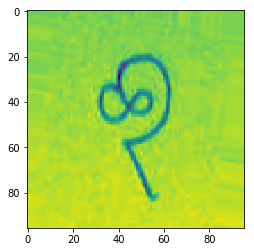

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_test[num][0], interpolation='nearest')
plt.show()

MODEL loaded


MODEL loaded
(1, 1, 96, 96)
[5]


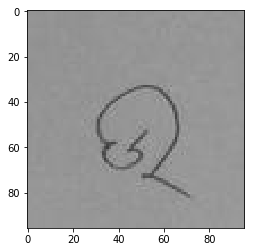

In [14]:
from keras.preprocessing.image import img_to_array, load_img
from matplotlib import pyplot as plt

SIZE = 96
model = load_model('second_99accuracymodel.h5')
print("MODEL loaded")

img = load_img(r"E:\Python Coding\ODIA DATASET\NewData\5\5_56.jpg", color_mode='grayscale', target_size=(SIZE, SIZE))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
print(x.shape)
print(model.predict_classes(x))
plt.imshow(img)
